
Problem 3:


Identify which all stocks are moving together and which all stocks are different from each other.

---



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
stock  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Clustering/data_stocks.csv')

In [4]:
stock['DATE'] = pd.to_datetime(stock['DATE'])

In [5]:
data = stock.set_index('DATE')

In [6]:
data.head()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:01.491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,38.99,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1970-01-01 00:00:01.491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,39.01,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
1970-01-01 00:00:01.491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,38.91,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
1970-01-01 00:00:01.491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,38.84,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
1970-01-01 00:00:01.491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,38.93,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(data.values)

In [8]:
normalized_data = pd.DataFrame(scaler.transform(data.values),columns = data.columns,index = data.index)

In [9]:
normalized_data.head()

,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,NASDAQ.AMAT,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:01.491226200,0.213425,0.109930,0.144559,0.051310,0.462916,0.245560,0.061208,0.843663,0.541984,0.147541,...,0.041803,0.859284,0.055655,0.093943,0.788639,0.026646,0.105184,0.048780,0.509216,0.090988
1970-01-01 00:00:01.491226260,0.216458,0.112129,0.145380,0.076781,0.465473,0.242085,0.073063,0.848130,0.541126,0.149470,...,0.041803,0.859284,0.003591,0.093943,0.788639,0.027408,0.105184,0.040172,0.499357,0.090988
1970-01-01 00:00:01.491226320,0.207665,0.108465,0.144973,0.073274,0.462276,0.244884,0.069203,0.845617,0.550777,0.139826,...,0.051165,0.865832,0.000000,0.106304,0.787318,0.026646,0.097671,0.040890,0.496357,0.092288
1970-01-01 00:00:01.491226380,0.217759,0.112862,0.142916,0.067660,0.460358,0.242085,0.068575,0.835846,0.540268,0.133076,...,0.045722,0.865832,0.028725,0.107540,0.787318,0.026266,0.100676,0.050215,0.496357,0.093588
1970-01-01 00:00:01.491226440,0.221102,0.125159,0.143737,0.060539,0.462596,0.238996,0.074444,0.835846,0.543700,0.141755,...,0.046157,0.876019,0.003591,0.103832,0.788639,0.026646,0.103681,0.052367,0.496142,0.081456


I am using PCA for identifying the pattern

In [10]:
from sklearn.decomposition import PCA


In [11]:
pca = PCA(n_components=1)
pca.fit(normalized_data)

PCA(n_components=1)

In [73]:
principal_components = pca.components_

In [74]:
# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

dividing based upon the standard deviation

In [103]:
# Threshold for principal component values to group stocks
threshold = np.std(principal_components[:][0])

# Group stocks based on first principal component values
group1 = []
group2 = []
for i, stock in enumerate(normalized_data):
    if principal_components[:,i][0] > threshold:
        #print(principal_components[i, 0], threshold)
        group1.append(stock)
    else:
        group2.append(stock)

In [106]:
print(f'there are {len(group1)} in group1 and {len(group2)} in group2 values , groups represent the stocks which as moving similarl or different')

there are 68 in group1 and 433 in group2 values , groups represent the stocks which as moving similarl or different


In [112]:
# plotting for these two groups 6 values values 
import random
values = [random.sample(group1,6),random.sample(group2,6)]

In [113]:
import itertools
values = list(itertools.chain(*values))

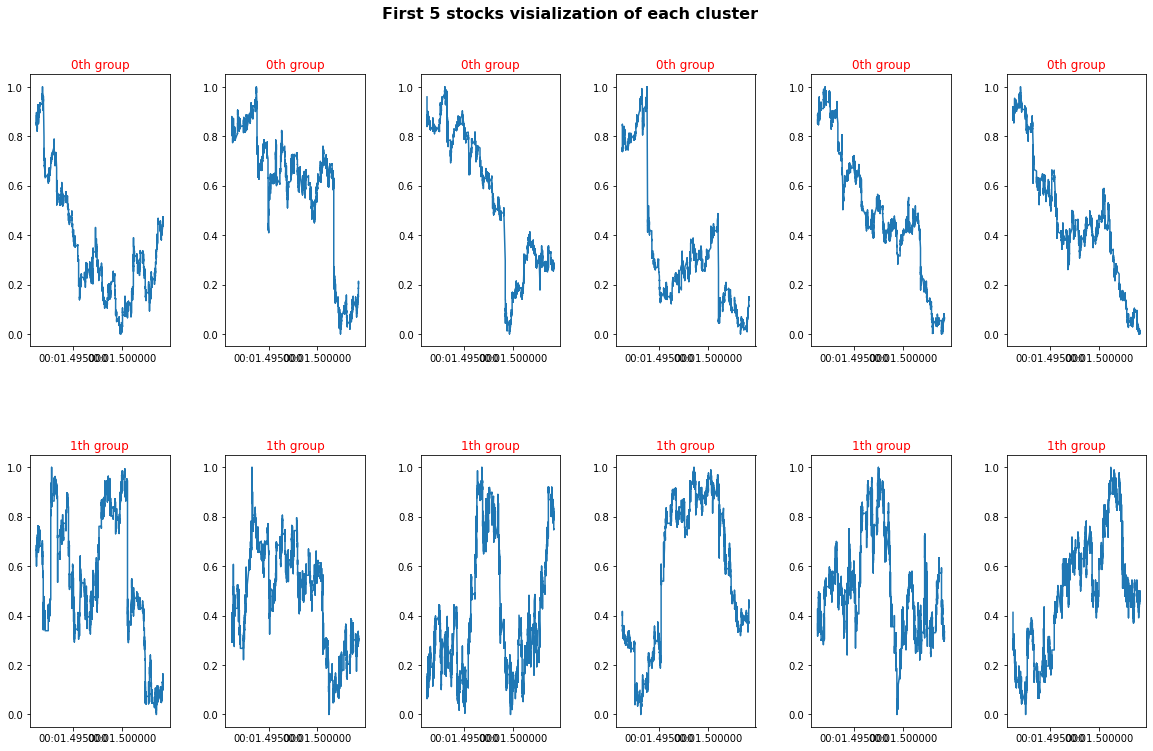

In [117]:
fig, axes = plt.subplots(2,6, figsize=(20, 12))
axes = axes.flatten()
for i,value in enumerate(values):
  if i%5 <= 6:
    axes[i].set_title(f'{i//6}th group',color = 'red')
  axes[i].plot(normalized_data[value])
plt.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle('First 5 stocks visialization of each cluster',
    fontsize=16,
    fontweight="bold",
    x=0.5,
    y=0.95,
    ha="center",
    va="center")
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Clustering/stock_group_random6.png')




dividing based upon the mean

In [118]:
# Threshold for principal component values to group stocks
threshold = np.mean(principal_components[:][0])

# Group stocks based on first principal component values
group3 = []
group4 = []
for i, stock in enumerate(normalized_data):
    if principal_components[:,i][0] > threshold:
        #print(principal_components[i, 0], threshold)
        group3.append(stock)
    else:
        group4.append(stock)

In [119]:
print(f'there are {len(group3)} in group3 and {len(group4)} in group4 values , groups represent the stocks which as moving similarl or different')

there are 211 in group3 and 290 in group4 values , groups represent the stocks which as moving similarl or different


In [120]:
values = [random.sample(group3,6),random.sample(group4,6)]
values = list(itertools.chain(*values))

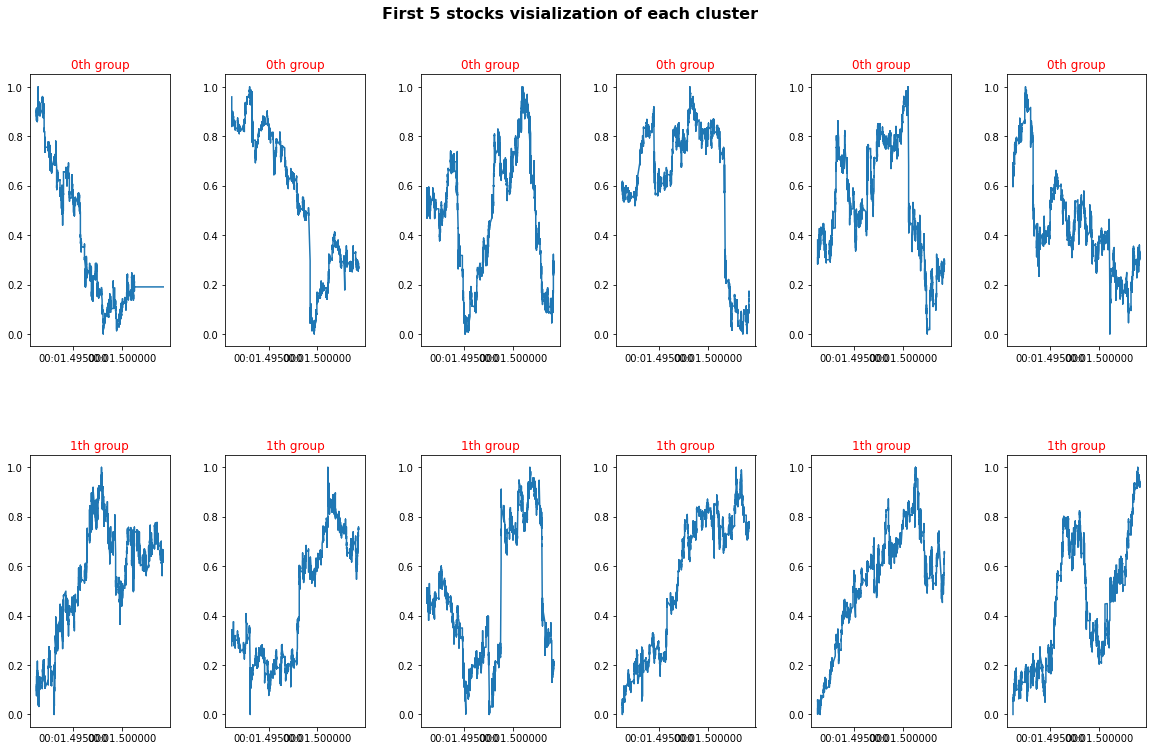

In [121]:
fig, axes = plt.subplots(2,6, figsize=(20, 12))
axes = axes.flatten()
for i,value in enumerate(values):
  if i%5 <= 6:
    axes[i].set_title(f'{i//6}th group',color = 'red')
  axes[i].plot(normalized_data[value])
plt.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle('First 5 stocks visialization of each cluster',
    fontsize=16,
    fontweight="bold",
    x=0.5,
    y=0.95,
    ha="center",
    va="center")
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Clustering/stock_group2_random6.png')




grouping based on the median values

In [122]:
# Threshold for principal component values to group stocks
threshold = np.median(principal_components[:][0])

# Group stocks based on first principal component values
group5 = []
group6 = []
for i, stock in enumerate(normalized_data):
    if principal_components[:,i][0] > threshold:
        #print(principal_components[i, 0], threshold)
        group5.append(stock)
    else:
        group6.append(stock)

In [124]:
print(f'there are {len(group5)} in group5 and {len(group6)} in group6 values , groups represent the stocks which as moving similarl or different')

there are 250 in group5 and 251 in group6 values , groups represent the stocks which as moving similarl or different


In [125]:
values = [random.sample(group5,6),random.sample(group6,6)]
values = list(itertools.chain(*values))

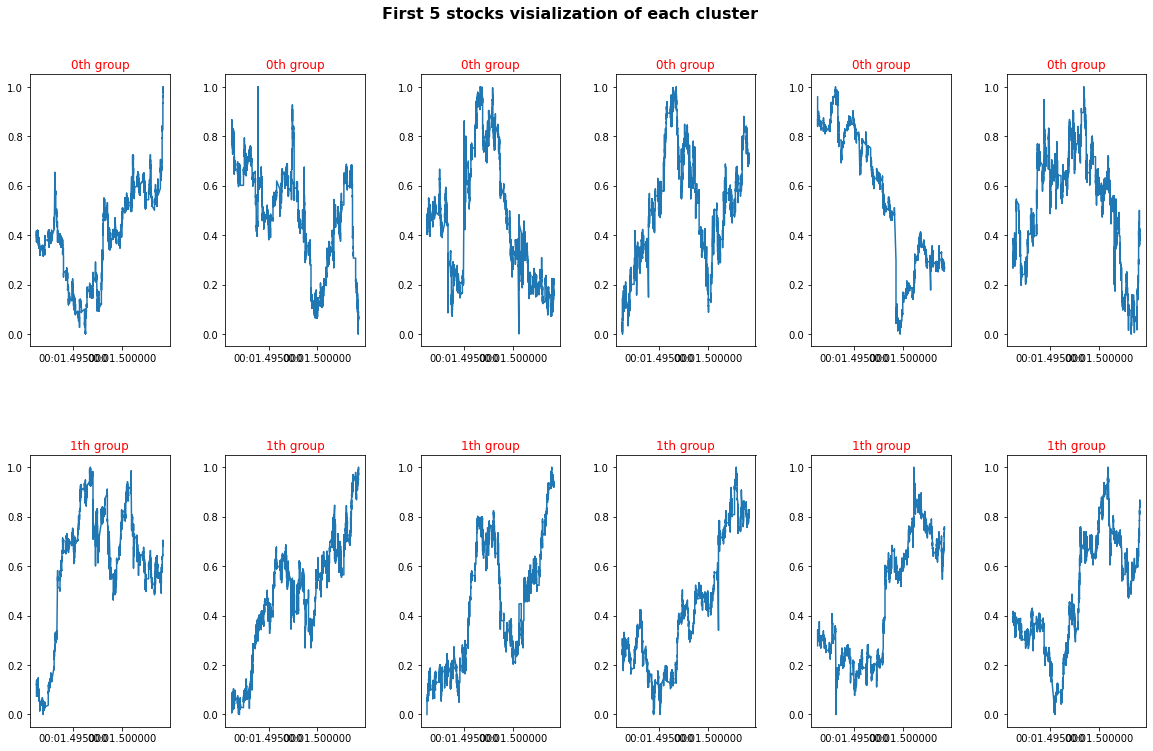

In [126]:
fig, axes = plt.subplots(2,6, figsize=(20, 12))
axes = axes.flatten()
for i,value in enumerate(values):
  if i%5 <= 6:
    axes[i].set_title(f'{i//6}th group',color = 'red')
  axes[i].plot(normalized_data[value])
plt.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle('First 5 stocks visialization of each cluster',
    fontsize=16,
    fontweight="bold",
    x=0.5,
    y=0.95,
    ha="center",
    va="center")
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Clustering/stock_group3_random6.png')




# let's combine all the odd(> threshold ) and even (< threshold) and try to figre out which all stocks are avaibale in all three groups individually. 

In [130]:
def IntersecOfSets(arr1, arr2, arr3):
    # Converting the arrays into sets
    s1 = set(arr1)
    s2 = set(arr2)
    s3 = set(arr3)
     
    # Calculates intersection of
    # sets on s1 and s2
    set1 = s1.intersection(s2)         #[80, 20, 100]
     
    # Calculates intersection of sets
    # on set1 and s3
    result_set = set1.intersection(s3)
     
    # Converts resulting set to list
    final_list = list(result_set)
    return final_list

In [131]:
group1_new = IntersecOfSets(group1 , group3, group5)
group2_new = IntersecOfSets(group2 , group4, group6)

In [132]:
print(f'there are {len(group1_new)} in group1_new and {len(group2_new)} in group2_new values , groups represent the stocks which as moving similarl or different')

there are 68 in group1_new and 251 in group2_new values , groups represent the stocks which as moving similarl or different


In [133]:
values = [random.sample(group1_new,6),random.sample(group2_new,6)]
values = list(itertools.chain(*values))

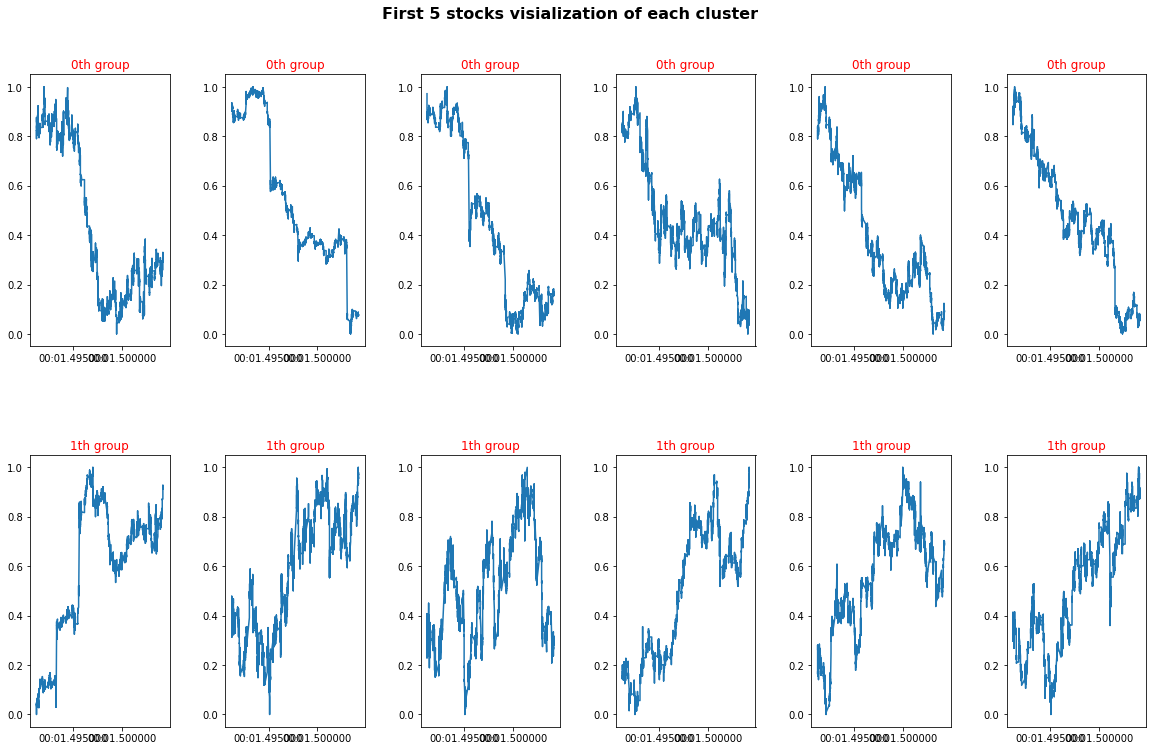

In [134]:
fig, axes = plt.subplots(2,6, figsize=(20, 12))
axes = axes.flatten()
for i,value in enumerate(values):
  if i%5 <= 6:
    axes[i].set_title(f'{i//6}th group',color = 'red')
  axes[i].plot(normalized_data[value])
plt.subplots_adjust(hspace=0.4, wspace=0.4)
fig.suptitle('First 5 stocks visialization of each cluster',
    fontsize=16,
    fontweight="bold",
    x=0.5,
    y=0.95,
    ha="center",
    va="center")
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Clustering/stock_all_random6.png')




Conclusion: we can see that group 0 has kind of similar plot while group 2 plots has very different , so we can say that there are approximetly 68 different stocks which are moving in same direction